## Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML Helpers/Metrics
import pickle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("output/data/ml_soccer_data.csv")
df = df.loc[df.season_name == 2022]
print(df.shape)
df.head()

(492, 58)


,season_name,player_id,player_name,minutes_played,offensive_goals_added,offensive_goals_added_90,player_age,guaranteed_compensation_1,minutes_played_1,share_team_touches_1,attempted_passes_1,completed_passes_1,total_distance_yds_1,total_vertical_distance_yds_1,xcompleted_passes_1,goals_added_above_avg_Dribbling_1,goals_added_above_avg_Fouling_1,goals_added_above_avg_Interrupting_1,goals_added_above_avg_Passing_1,goals_added_above_avg_Receiving_1,goals_added_above_avg_Shooting_1,guaranteed_compensation_2,minutes_played_2,share_team_touches_2,attempted_passes_2,completed_passes_2,total_distance_yds_2,total_vertical_distance_yds_2,xcompleted_passes_2,goals_added_above_avg_Dribbling_2,goals_added_above_avg_Fouling_2,goals_added_above_avg_Interrupting_2,goals_added_above_avg_Passing_2,goals_added_above_avg_Receiving_2,goals_added_above_avg_Shooting_2,guaranteed_compensation_3,minutes_played_3,share_team_touches_3,attempted_passes_3,completed_passes_3,total_distance_yds_3,total_vertical_distance_yds_3,xcompleted_passes_3,goals_added_above_avg_Dribbling_3,goals_added_above_avg_Fouling_3,goals_added_above_avg_Interrupting_3,goals_added_above_avg_Passing_3,goals_added_above_avg_Receiving_3,goals_added_above_avg_Shooting_3,played_two_years_ago,played_three_years_ago,primary_position_AM,primary_position_CB,primary_position_CM,primary_position_DM,primary_position_FB,primary_position_ST,primary_position_W
2927,2022,0Oq630dXQ6,Kevin Cabral,1896.0,-0.887200,-0.042114,22.0,1440000.0,2182.0,0.047993,583.0,446.0,9341.4938,-1334.5887,477.6853,-0.5895,0.292400,-0.5129,-1.1422,0.9445,0.1802,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False,False,False,False,False,False,True
2928,2022,0Oq632k7Q6,Danny Leyva,1046.0,-0.528200,-0.045447,18.0,100798.0,989.0,0.046333,532.0,440.0,9292.0537,2135.7791,435.4407,-0.3145,-0.022491,-0.0111,-0.3453,-0.3065,-0.1386,83052.0,68.0,0.033300,39.0,36.0,625.4843,64.6718,33.8605,-0.0292,0.0030,-0.0272,-0.0269,-0.0043,-0.0126,89872.2,471.0,0.074183,257.0,219.0,4970.8071,1150.8133,223.5741,-0.0135,-0.2487,-0.1999,-0.0550,-0.1108,0.0124,True,True,False,False,True,False,False,False,False
2929,2022,0Oq633dAQ6,Griffin Yow,307.0,-0.149400,-0.043798,19.0,116118.0,290.0,0.026645,100.0,58.0,2021.9371,472.1529,68.2641,0.1141,-0.003900,0.0577,0.0634,-0.0889,0.0505,96118.0,448.0,0.025842,92.0,68.0,1589.4724,-164.4759,70.9204,0.0205,-0.0109,0.0289,-0.1898,-0.2867,-0.1032,76368.4,67.0,0.019250,8.0,6.0,135.0742,-73.8911,6.8279,-0.0245,-0.0069,0.0006,-0.0519,-0.0171,-0.0343,True,True,False,False,False,False,True,False,False
2930,2022,0Oq63JA7Q6,Wyatt Omsberg,1376.0,0.350608,0.022932,26.0,85444.0,840.0,0.041811,372.0,288.0,8592.6451,2899.8791,286.2250,-0.0906,-0.038999,-0.5106,-0.0764,-0.0610,-0.0469,81375.0,215.0,0.050900,134.0,101.0,3318.9127,1003.8907,107.1716,0.0152,0.0208,0.2268,-0.0025,-0.0487,-0.0240,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,True,False,False,True,False,False,False,False,False
2931,2022,0Oq63P32Q6,Nkosi Burgess,1523.0,0.101000,0.005968,24.0,66724.0,2009.0,0.091764,1049.0,872.0,26608.9496,10418.1654,879.8107,0.0459,0.202600,-0.0677,0.0285,-0.3093,-0.1185,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False,True,False,False,False,False,False


## Evaluation

First model predicts OGA & Minutes Played then calculated OGA_90 directly

Second model directly predicts OGA_90

MARCEL metrics on 395 players > 500 minutes:

* The r2 is 0.24166398588747073.
* The mean squared error is 0.00209311540256787.
* The root mean squared error is 0.04575057816648736.
* The mean absolute error is 0.034029280657801204.

In [3]:
# Load the models from a file
with open('models/eval/minutes_model_eval.pkl', 'rb') as file:
    minutes_model = pickle.load(file)

with open('models/eval/oga_model_eval.pkl', 'rb') as file:
    oga_model = pickle.load(file)

with open('models/eval/oga90_model_eval.pkl', 'rb') as file:
    oga90_model = pickle.load(file)

In [4]:
# Generate Inferences
target_cols = ['season_name', 'player_id', 'player_name', 'minutes_played', 'offensive_goals_added', 'offensive_goals_added_90']
X = df.drop(columns=target_cols)

minutes = minutes_model.predict(X)
oga = oga_model.predict(X)
oga90_f = 90*oga / minutes

oga90 = oga90_model.predict(X)

In [5]:
# subset to columns we care about
sub = df.loc[:, target_cols]
sub["minutes_pred"] = minutes
sub["oga_pred"] = oga
sub["oga90_pred1"] = oga90_f
sub["oga90_pred2"] = oga90

sub.head()

,season_name,player_id,player_name,minutes_played,offensive_goals_added,offensive_goals_added_90,minutes_pred,oga_pred,oga90_pred1,oga90_pred2
2927,2022,0Oq630dXQ6,Kevin Cabral,1896.0,-0.887200,-0.042114,1912.180754,0.503945,0.023719,-0.000615
2928,2022,0Oq632k7Q6,Danny Leyva,1046.0,-0.528200,-0.045447,843.026692,-0.466675,-0.049821,-0.045964
2929,2022,0Oq633dAQ6,Griffin Yow,307.0,-0.149400,-0.043798,509.386277,-0.134282,-0.023725,-0.027430
2930,2022,0Oq63JA7Q6,Wyatt Omsberg,1376.0,0.350608,0.022932,1017.637270,-0.089454,-0.007911,-0.023364
2931,2022,0Oq63P32Q6,Nkosi Burgess,1523.0,0.101000,0.005968,1911.522122,-0.122731,-0.005779,-0.007274


In [6]:
sub.describe()

,season_name,minutes_played,offensive_goals_added,offensive_goals_added_90,minutes_pred,oga_pred,oga90_pred1,oga90_pred2
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,2022.0,1582.599593,-0.046607,-0.015616,1480.544535,-0.005057,-0.005892,-0.015240
std,0.0,1013.491220,1.008932,0.073046,578.991546,0.464138,0.031812,0.025502
min,2022.0,5.000000,-3.951100,-0.376875,210.743099,-1.190453,-0.247303,-0.074118
25%,2022.0,687.250000,-0.514725,-0.051580,1030.480084,-0.301584,-0.022392,-0.031863
50%,2022.0,1562.500000,-0.104200,-0.014350,1461.324046,-0.075588,-0.005282,-0.017904
75%,2022.0,2468.000000,0.288594,0.018765,1958.594450,0.199725,0.011822,-0.001800
max,2022.0,3736.000000,5.441400,0.500400,2917.684772,1.964971,0.094175,0.082703


In [7]:
# filter to 500+ minutes 
eval_sub = sub.loc[sub.minutes_played > 500]
eval_sub.describe()

,season_name,minutes_played,offensive_goals_added,offensive_goals_added_90,minutes_pred,oga_pred,oga90_pred1,oga90_pred2
count,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2022.0,1919.129114,-0.034839,-0.007932,1596.073780,0.029424,-0.002240,-0.011777
std,0.0,835.708563,1.120343,0.052604,537.812462,0.487300,0.030699,0.025416
min,2022.0,507.000000,-3.951100,-0.175733,210.743099,-1.190453,-0.247303,-0.074118
25%,2022.0,1218.000000,-0.660351,-0.038786,1173.988511,-0.270367,-0.017402,-0.028325
50%,2022.0,1889.000000,-0.164600,-0.007332,1602.248183,-0.025821,-0.001416,-0.014108
75%,2022.0,2646.000000,0.418150,0.021265,2005.966394,0.251834,0.013765,0.000809
max,2022.0,3736.000000,5.441400,0.154002,2917.684772,1.964971,0.094175,0.082703


In [8]:
eval_sub.sort_values(by=f"oga90_pred2", ascending=False).head(10)

,season_name,player_id,player_name,minutes_played,offensive_goals_added,offensive_goals_added_90,minutes_pred,oga_pred,oga90_pred1,oga90_pred2
3386,2022,vzqorrRk5a,Carles Gil,3181.0,4.5026,0.127392,2576.288551,1.954739,0.068287,0.082703
2996,2022,4JMA9R42MK,Adam Buksa,888.0,1.0754,0.108993,2259.549816,1.961541,0.078130,0.079544
3076,2022,EGMPVykqaY,Andreu Fontàs,2672.0,2.3412,0.078858,2465.918323,1.575498,0.057502,0.065745
3298,2022,gpMOa0lnqz,Luiz Araújo,2382.0,3.3574,0.126854,1877.853420,1.964971,0.094175,0.060297
3334,2022,ljqE2VkOQx,Luciano Acosta,2917.0,3.2658,0.100762,2779.010817,1.568648,0.050802,0.059811
3252,2022,eV5D9A9qKn,Sebastián Blanco,2010.0,2.2023,0.098610,1615.911595,1.409406,0.078498,0.056004
3281,2022,gOMnR0wlMw,Julian Gressel,2557.0,1.1858,0.041737,2385.737371,1.053179,0.039730,0.054732
3192,2022,Vj58zZ2Q8n,Michael Bradley,3411.0,1.7100,0.045119,2517.398616,1.443144,0.051594,0.054646
2988,2022,315VXoL7Q9,Emanuel Reynoso,2850.0,2.1606,0.068229,2576.837088,1.223687,0.042739,0.053790
3219,2022,a35rKGpLqL,Dániel Sallói,2759.0,-0.3674,-0.011985,2005.262683,1.462658,0.065647,0.052186


### Generate Evaluations

395

METRICS
The r2 is 0.1110014912020778.
The mean squared error is 0.0024537624970936422.
The root mean squared error is 0.0495354670624356.
The mean absolute error is 0.03519409381573393.



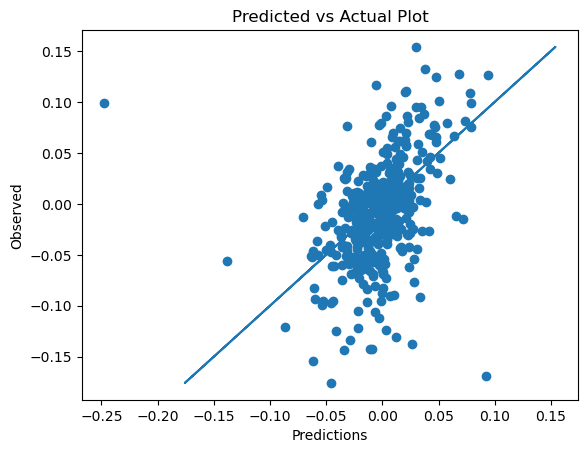

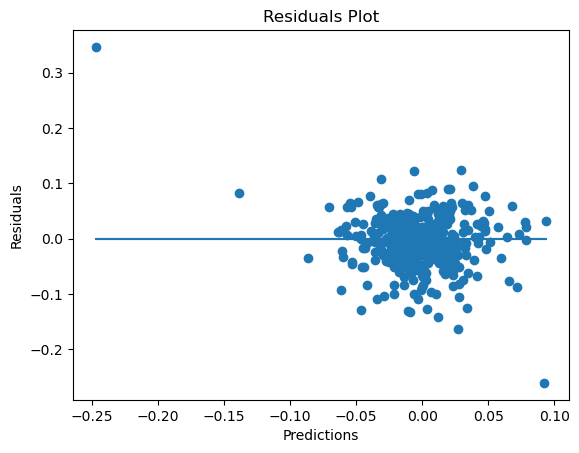

In [9]:
# Get eval metrics
print(len(eval_sub))

y_test = eval_sub.offensive_goals_added_90
test_preds = eval_sub.oga90_pred1

# get the metrics
resids = y_test - test_preds
r2 = r2_score(y_test, test_preds)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_preds)

# Print releveant metrics.
print()
print("METRICS")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The mean absolute error is {mae}.")
print()

# make a graph

# Predicted vs Actual Graph
plt.scatter(test_preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Observed")
plt.title("Predicted vs Actual Plot")
plt.plot(y_test, y_test)
plt.show()


# Residual Graph
plt.scatter(test_preds, resids)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.plot(test_preds, np.zeros(len(test_preds)))
plt.show()

395

METRICS
The r2 is 0.277893155389043.
The mean squared error is 0.001993117734918223.
The root mean squared error is 0.04464434717764639.
The mean absolute error is 0.03361471230811946.



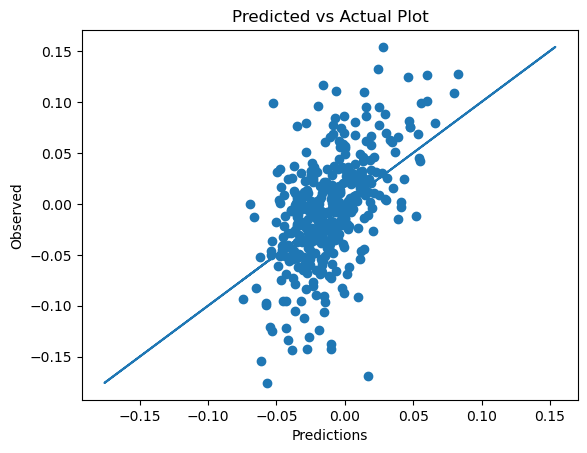

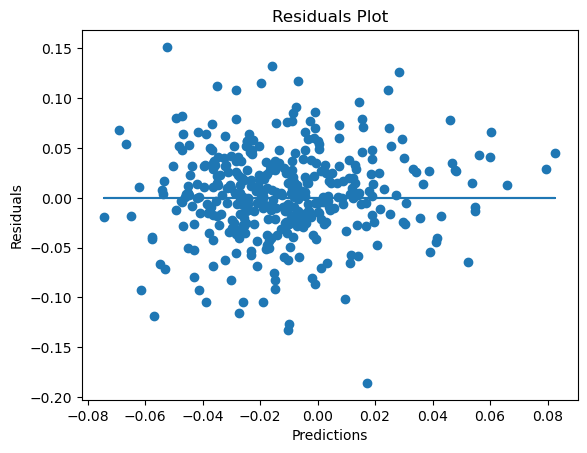

In [10]:
# Get eval metrics
print(len(eval_sub))

y_test = eval_sub.offensive_goals_added_90
test_preds = eval_sub.oga90_pred2

# get the metrics
resids = y_test - test_preds
r2 = r2_score(y_test, test_preds)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_preds)

# Print releveant metrics.
print()
print("METRICS")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The mean absolute error is {mae}.")
print()

# make a graph

# Predicted vs Actual Graph
plt.scatter(test_preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Observed")
plt.title("Predicted vs Actual Plot")
plt.plot(y_test, y_test)
plt.show()


# Residual Graph
plt.scatter(test_preds, resids)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.plot(test_preds, np.zeros(len(test_preds)))
plt.show()

## Results

The OGA_90 derived from two models, one for OGA and one for playing time, does not perform as well as the MARCEL projections.

Further, the OGA_90 predicted directly from a single model outperforms MARCEL and the multi-step model.

Next steps:

I will retrain the OGA_90 model on all data including the holdout set. Then will generate predictions for 2023